<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/ml04_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* scikit-learn 패키지의 iris 데이터 셋을 로드.
* iris 데이터 탐색
* 데이터 셋을 훈련 셋과 테스트 셋으로 분리
* KNN 분류기 생성
* 모델 훈련
* 훈련 셋 평가(정확도), 테스트 셋 평가(정확도)
    * confusion matrix, 분류 리포트 출력
* KNN 모델의 k값을 변화 시키면서, 모델 훈련/평가를 반복.
    * 테스트 셋에서 가장 좋은 결과를 주는 k값을 찾음.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris # iris 데이터 셋
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# 데이터 불러오기
iris = load_iris()

In [ ]:
# iris 탐색
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# DataFrame 만들기
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


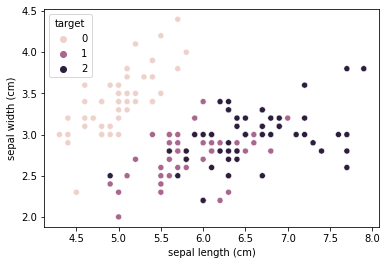

In [ ]:
# sepal width ~ sepal length 산점도
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue = 'target', data=df)

plt.show()

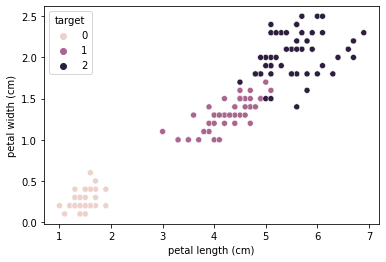

In [ ]:
# petal width ~ petal length 산점도
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue = 'target', data=df)

plt.show()

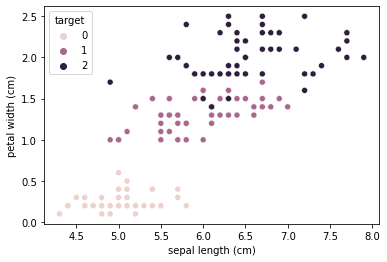

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue = 'target', data=df)

plt.show()

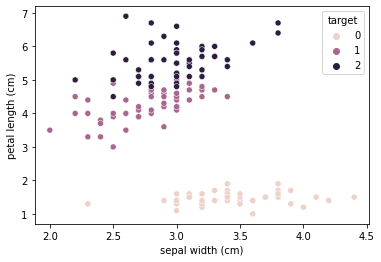

In [ ]:
sns.scatterplot(x='sepal width (cm)', y='petal length (cm)', hue = 'target', data=df)

plt.show()

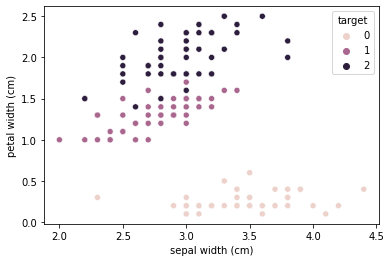

In [ ]:
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue = 'target', data=df)

plt.show()

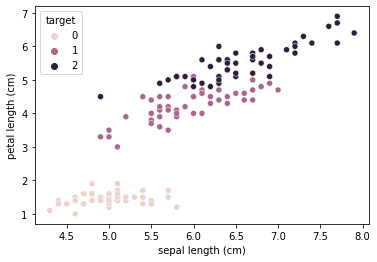

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue = 'target', data=df)

plt.show()

In [ ]:
# 2개씩 짝지어 그래프를 그려보면 다음과 같이 6개의 그래프가 나오게 된다. 
# 그중에서 sepal width, sepal length를 제외하면 target 별로 어느정도 구분이 되는 것을 알수 있다.
# 물론 2개씩 짝지어 보는 것 이외에도 다양한 원인이 있을 수 있지만 다른 상관관계는 배제하도록 하자.

In [ ]:
# sepal width, sepal length의 산점도의 결과 target 0은 0끼리 모여있지만 1, 2는 많이 겹치게 보인다.
# 따라서 KNeighbors 분류를 하면 1, 2는 정확도가 높은 결과를 얻지 못할것이라 예상된다.
# 또한 target이 순서대로 나열되어 있으므로 (0: 50개, 1: 50개, 2: 50개) 순차추출은 부적합해 보인다.
# 따라서 임의 추출 또는 층화 추출을 통해 train, test 셋을 나누어 주는게 좋다고 판단된다.
# 마지막으로 둘다 길이가 cm이지만 길이가 더 긴것이 많으므로(너비 보단 길이의 영향이 더 크게 될 것이라 예상) 정규화 또는 표준화의 필요성이 보인다.

# train/test 셋 산점도 그림도 sepal width, sepal length를 활용해서 예측해 보도록 한다.

In [ ]:
# 7 : 3으로 train/test 셋 나눔
150*0.7, 150*0.3

(105.0, 45.0)

In [ ]:
# train, test 셋 나누기
# 1) 임의 추출
X_ran_train, X_ran_test, y_ran_train, y_ran_test = train_test_split(iris.data, iris.target,
                                                                    train_size=105,
                                                                    random_state = 42) # seed값을 설정

In [ ]:
X_ran_train.shape, y_ran_train.shape

((105, 4), (105,))

In [ ]:
np.unique(y_ran_train, return_counts=True) # 31, 37, 37로 잘 섞인것으로 보인다.

(array([0, 1, 2]), array([31, 37, 37]))

In [ ]:
X_ran_test.shape, y_ran_test.shape

((45, 4), (45,))

In [ ]:
np.unique(y_ran_test, return_counts=True) # 19, 13, 13으로 0번이 많아 보인다.

(array([0, 1, 2]), array([19, 13, 13]))

In [ ]:
# 2) 층화 추출
X_sta_train, X_sta_test, y_sta_train, y_sta_test = train_test_split(iris.data, iris.target,
                                                                    test_size=0.3,
                                                                    stratify=iris.target,
                                                                    random_state = 42)

In [ ]:
X_sta_train.shape, y_sta_train.shape

((105, 4), (105,))

In [ ]:
np.unique(y_sta_train, return_counts=True) # 각 타겟에서 35개씩 골라진 것을 알 수 있다.

(array([0, 1, 2]), array([35, 35, 35]))

In [ ]:
X_sta_test.shape, y_sta_test.shape

((45, 4), (45,))

In [ ]:
np.unique(y_sta_test, return_counts=True)

(array([0, 1, 2]), array([15, 15, 15]))

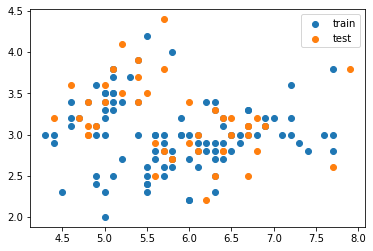

In [ ]:
plt.scatter(X_ran_train[:, 0], X_ran_train[:, 1], label='train')
plt.scatter(X_ran_test[:, 0], X_ran_test[:, 1], label='test')

plt.legend()
plt.show()

In [ ]:
# train, test 데이터를 볼때 
# 왼쪽위의 target0은 예상대로 어느정도 몰려있음을 알 수 있다.
# target1, 2는 k-근접 분류에서는 구분이 어려워 보인다.

In [ ]:
# KNN 분류기 생성
knn = KNeighborsClassifier()

In [ ]:
# (랜텀 추출)모델 훈련
knn.fit(X_ran_train, y_ran_train)

KNeighborsClassifier()

In [ ]:
# (랜텀 추출) 훈련 셋 평가 정확도
knn.score(X_ran_train, y_ran_train)

0.9523809523809523

In [ ]:
# 훈련한 데이터 셋임에도 정확도가 1이 나오지는 않았지만 0.95의 정확도를 보여준다.

In [ ]:
# (랜텀 추출) 테스트 셋 평가 정확도
knn.score(X_ran_test, y_ran_test)

1.0

In [ ]:
# 예상과는 다르게 정확한 분류가 이루어 졌다.

In [ ]:
# confusion matrix
y_ran_pred = knn.predict(X_ran_test)
report = classification_report(y_true=y_ran_test, y_pred=y_ran_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# k값을 변화 시키면서 최적의 k를 찾는다.
accuracy= []
for k in range(1,106): # 테스트 셋이 150*0.7 = 105이므로 
  knns = KNeighborsClassifier(n_neighbors=k)
  knns.fit(X_ran_train, y_ran_train)
  ac = knns.score(X_ran_test, y_ran_test)
  accuracy.append(ac)
print(accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.4666666666666667, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.28888888888888886, 0.28888888888888886, 0.28888888888888886, 0.28888888888888886, 0.28888888888888886, 0.28

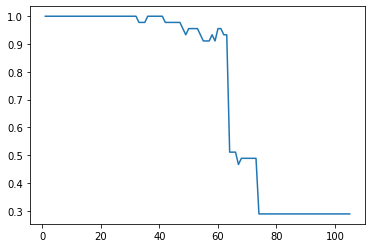

In [ ]:
plt.plot(range(1,106), accuracy)

plt.show()

In [ ]:
# 60 이전까지는 0.9 이상의 정확도를 보이다가 60이후부터는 급격하게 떨어지는 모습을 볼수 있다.
# k값이 60 이전까지는 각 target이 확실히 분류 되어 있지만 
# 60 이후부터는 서로 target의 범위가 k개 안에 들어가게 되므로 위와 같은 일이 발생함을 볼 수 있다고 생각한다.
# 최적의 k는 32 이후에 1에서 0.9777로 떨어지므로 32이라 생각합니다.

# 또 train에서와는 달리 test에서 결과가 좋게 나타난것은 랜덤하게 고른 test셋이 우연히 각 target별로 모여 있었을 가능성이 높다고 생각한다.
# 따라서 더 좋은 결과를 얻기 위해서는 더 랜덤하게 섞일 필요성이 있다.

In [ ]:
# (층화 추출)모델 훈련
knn.fit(X_sta_train, y_sta_train)

KNeighborsClassifier()

In [ ]:
# (층화 추출) 훈련 셋 평가 정확도
knn.score(X_sta_train, y_sta_train)

0.9714285714285714

In [ ]:
# 여전히 1이 아니지만 랜덤 추출 보다 높은 정확도를 보여준다.

In [ ]:
# (층화 추출) 테스트 셋 평가 정확도
knn.score(X_sta_test, y_sta_test)

0.9777777777777777

In [ ]:
# 랜덤 추출 정확도보다 낮은 0.9777임을 보여준다.
# 랜덤 추출보다 더 골고루 분포된 데이터가 테스트 셋으로 지정되어서 이런 결과가 된것으로 예상된다.

In [ ]:
# confusion matrix
y_sta_pred = knn.predict(X_sta_test)
report = classification_report(y_true=y_sta_test, y_pred=y_sta_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# k값을 변화 시키면서 최적의 k를 찾는다.
accuracy_sta= []
for k in range(1,106): # 테스트 셋이 150*0.7 = 105이므로 
  knns = KNeighborsClassifier(n_neighbors=k)
  knns.fit(X_sta_train, y_sta_train)
  ac = knns.score(X_sta_test, y_sta_test)
  accuracy_sta.append(ac)
print(accuracy_sta)

[0.9333333333333333, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888,

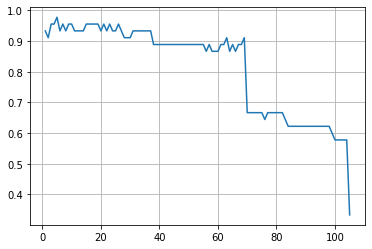

In [ ]:
plt.plot(range(1,106), accuracy_sta)

plt.grid()
plt.show()

In [ ]:
# 약 k=70 이후로 정확도가 낮아지는 것을 볼 수 있다.
# 최적의 k=5(정확도가 가장 높다) 

# 임의 추출과는 다르게 정확도가 1이 나온 k는 없었다.
# 하지만 이는 곧 test 셋이 골고루 잘 분포 됐음을 알 수 있다. 
# 또 confusion matrix에서 보면 예상 했던 것 처럼 서로 잘 모여 있는 target 0은 다 맞춘 보습을 보여 주었다.
# 하지만 target 1, 2는 겹친 부분이 많아서 분류기를 썼을 때 정확도가 1이 아닌 모습을 보여준다.

# import

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 준비

In [ ]:
iris = load_iris()

In [ ]:
type(iris)
#> sklearn.utils.Bunch: 파이썬의 dict와 비슷한 클래스.(key:value 형식으로 자료를 저장하는 타입.)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
features = iris['data'] #> 특성들의 (150, 4) shape의 2차원 배열
target = iris['target'] #> 레이블(타겟, 클래스들)의  (150,) shape의 1차원 배열

In [ ]:
features.shape, target.shape

((150, 4), (150,))

In [ ]:
X, y =load_iris(return_X_y=True) #> 특성들의 2차원 배열과 타겟 1차원 배열을 리턴.

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
iris2 = load_iris(as_frame=True) #> sklearn.utils.Bunch 클래스 객체

In [ ]:
df = iris2['data'] # 키 target은 pandas.DataFrame을 저장.
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_target = iris2['target'] #> key target은 pandas.Series를 저장.
iris_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


시각화를 편리하게 하기 위해서 데이터와 타겟을 하나의 데이터프레임으로 합침.

In [ ]:
df['species'] = iris_target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


타겟의 값을 0, 1, 2 대신에 setosa, versicolor, virginica로 사용

In [ ]:
for i, v in enumerate(iris2['target_names']):
  df.loc[df['species'] == i, 'species'] = v    

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

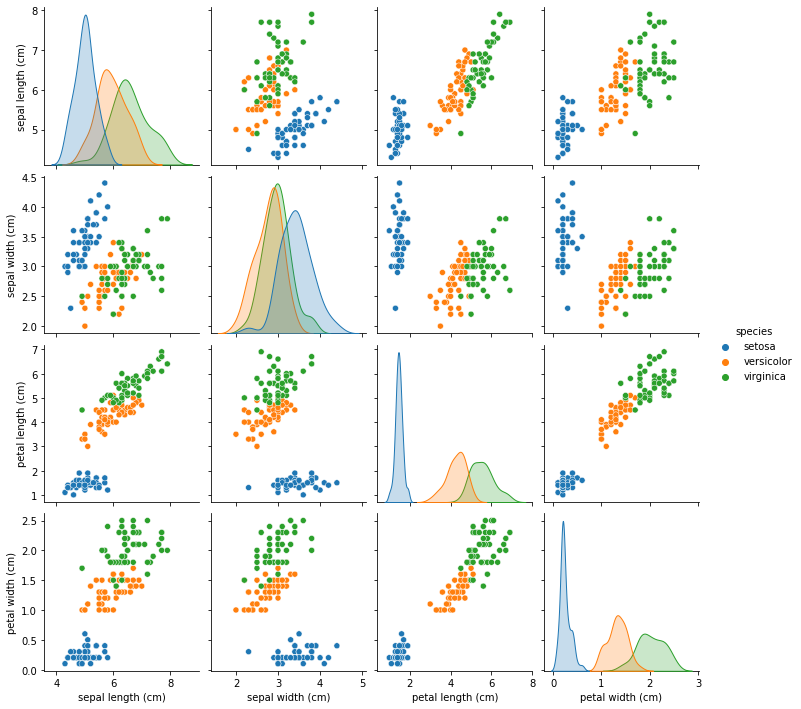

In [ ]:
sns.pairplot(data=df, hue='species')
plt.show()

문제 정의

* 다중 클래스 분류: 레이블(타겟)이 3개 이상의 클래스를 갖는 문제(setosa, versicolor, virginica)
* 특성 선택: 4개의 특성을 모두 사용.

## 훈련/테스트 셋 분리

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features, target,
                                                   test_size=0.2,
                                                   stratify=target,
                                                   random_state=42)
#> features : 데이터 (2차원 배열), target: 레이블(1차원 배열)
#> test_size = 0.2 : 테서트 셋의 크기를 전체 데이터의 20%. --> 훈련 셋의 크기는 전체 데이터의 80%
#> stratify = True: 층화 추출. target의 비율을 훈련 셋과 테스트 셋에서 유지 

In [ ]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [ ]:
y_train.shape, y_test.shape

((120,), (30,))

In [ ]:
# 훈련 셋의 타겟 비율
np.unique(y_train, return_counts =True)

(array([0, 1, 2]), array([40, 40, 40]))

In [ ]:
# 테스트 셋의 타겟 비율
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

# KNN 모델 훈련, 평가

In [ ]:
knn = KNeighborsClassifier() #모델 생성

In [ ]:
knn.fit(X_train, y_train) # 훈련 셋으로 모델을 훈련

KNeighborsClassifier()

In [ ]:
# 훈련 셋의 예측값
train_pred = knn.predict(X_train)
train_pred

array([0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# 훈련 셋의 실젯값(타겟)
y_train

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# 훈련 셋의 정확도
np.mean(train_pred == y_train) #> 97%

0.9666666666666667

In [ ]:
knn.score(X_train, y_train)

0.9666666666666667

In [ ]:
accuracy_score(y_true=y_train, y_pred=train_pred)

0.9666666666666667

In [ ]:
# 훈련 셋의 confusion matrix
confusion_matrix(y_true=y_train, y_pred=train_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  2, 38]])

In [ ]:
train_report = classification_report(y_train, train_pred)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.95      0.95        40
           2       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
# 테스트 셋의 예측값
test_pred = knn.predict(X_test)
test_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [ ]:
# 테스트 셋의 실젯값(레이블)
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [ ]:
# 테스트 셋의 정확도
accuracy_score(y_true=y_test, y_pred=test_pred)

1.0

In [ ]:
# 테스트 셋의 confusion matrix
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [ ]:
test_report = classification_report(y_test, test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



* __과대적합(overfitting)__: 훈련 셋에서의 평가 점수가 테스트 셋에서의 평가 점수보다 더 좋은 경우.
    * 일반적으로, 지도 학습(supervised learning)에서는 과대적합이 발생하는 경우가 많음.
    * 과대적합의 정도(크기)가 작을 수록 좋은 모델.
* __과소적합(underfitting)__: 훈련 셋에서의 평가 점수가 테스트 셋에서의 평가 점수보다 더 낮은 경우.
    * 보통 샘플의 개수가 적은 경우 과소 적합이 나타나는 경우가 있음.
    * 훈련 셋과 테스트 셋의 샘플들ㅇ르 더 많이 수집해서, 훈련과 테스트를 실행하면 과소접합을 해결할 수 있음.
    * __교차 검증(cross validation)__을 사용해서 훈련 셋의 크기를 늘려주는 효과를 줄 수 있음.

# 모델 튜닝

k값(가장 가까운 이웃의 개수)의 변화에 따른 정확도의 변화

In [ ]:
k_values = np.arange(1, 51) # KNN 모델에서 사용할 k값들의 배열
train_scores = [] # 훈련 셋에서의 정확도를 저장할 리스트
test_scores = [] # 테스트 셋에서의 정확도를 저장할 리스트

for k in k_values:
  knn_clf = KNeighborsClassifier(n_neighbors=k) # 모델 생성
  knn_clf.fit(X_train, y_train) # 모델 훈련
  train_acc = knn_clf.score(X_train, y_train) # 훈련 셋에서의 정확도
  train_scores.append(train_acc)
  test_acc=knn_clf.score(X_test, y_test) # 테스트 셋에서의 정확도
  test_scores.append(test_acc)

print(train_scores)
print(test_scores)

[1.0, 0.975, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.975, 0.975, 0.975, 0.975, 0.975, 0.9666666666666667, 0.975, 0.9833333333333333, 0.975, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.975, 0.9833333333333333, 0.975, 0.9833333333333333, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.9583333333333334, 0.95, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.9416666666666667, 0.9583333333333334, 0.9333333333333333, 0.9416666666666667, 0.95, 0.95, 0.9416666666666667, 0.9416666666666667, 0.9083333333333333, 0.9166666666666666, 0.925, 0.925, 0.9]
[0.9666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.966666

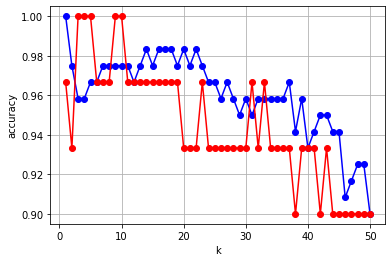

In [ ]:
# 훈련 셋/테스트 셋 정확도 시각화
plt.plot(k_values, train_scores, 'bo-', label='train score')
plt.plot(k_values, test_scores, 'ro-', label='test score')

plt.grid()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend
plt.show()

# 특성 스케일링(feature scaling)

In [ ]:
scaler = StandardScaler() # 표준화 스케일러 생성

In [ ]:
# (1) 훈련 셋에서 각 특성(변수)들의 평균과 표준 편차를 찾음.
# (2) 훈련 셋의 각 특성들의 값들을 변환(스케일링).
X_tr_scaled = scaler.fit_transform(X_train)

In [ ]:
scaler.mean_ # 훈련 셋의 4 개 특성의 평균들

array([5.84166667, 3.04833333, 3.77      , 1.205     ])

In [ ]:
scaler.var_ # 훈련 셋의 4개 특성의 분산들

array([0.70126389, 0.19949722, 3.1016    , 0.57680833])

In [ ]:
X_tr_scaled[:5, :]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575]])

In [ ]:
# 테스트 셋은 훈련 셋의 평균과 표준편차를 사용해서 스케일링.--> fit 호출 없이 trainsform 메서드만 호출.
X_te_scaled = scaler.transform(X_test)

In [ ]:
X_te_scaled[:5, :]

array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558]])

In [ ]:
# 스케일된 특성들을 사용해서 k값을 변화에 따른 성능 평가
k_values = np.arange(1, 51)
train_scores = []
test_scores = []

for k in k_values:
  knn_clf = KNeighborsClassifier(n_neighbors=k) # 모델 생성
  knn_clf.fit(X_tr_scaled, y_train) # 모델 훈련
  tr_acc = knn_clf.score(X_tr_scaled, y_train) # 훈련 셋 정확도 
  train_scores.append(tr_acc)
  te_acc = knn_clf.score(X_te_scaled, y_test) # 테스트 셋 정확도
  test_scores.append(te_acc)

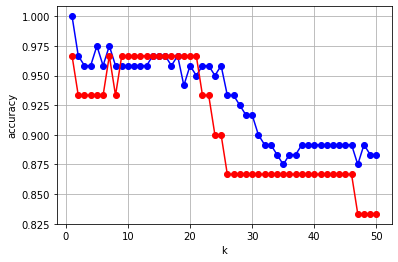

In [ ]:
# 훈련 셋/테스트 셋 정확도 시각화
plt.plot(k_values, train_scores, 'bo-', label='train score')
plt.plot(k_values, test_scores, 'ro-', label='test score')

plt.grid()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend
plt.show()